In [1]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\cartoes.csv'

df = pd.read_csv(DATA)
df = df.sort_values(by = 'frequencia',ascending=False)

df

,tipo_de_defeito,frequencia
0,amassado,71
4,numeros_errados,44
1,perfurado,28
3,caracteres_errados,20
2,impressao_ilegivel,12
5,outros,6


In [7]:
import sys
import os
sys.path.append(os.path.abspath('../'))

In [9]:
from meus_modulos.auxiliares import tabela_dist_freq

df_pareto = tabela_dist_freq(df, 'frequencia', coluna_frequencia=True)

df_pareto = df_pareto.set_index(df['tipo_de_defeito'])

df_pareto

,frequencia,frequencia_relativa,frequencia_acumulada,frequencia_relativa_acumulada
tipo_de_defeito,,,,
amassado,71,0.392265,71,0.392265
numeros_errados,44,0.243094,115,0.635359
perfurado,28,0.154696,143,0.790055
caracteres_errados,20,0.110497,163,0.900552
impressao_ilegivel,12,0.066298,175,0.966851
outros,6,0.033149,181,1.000000


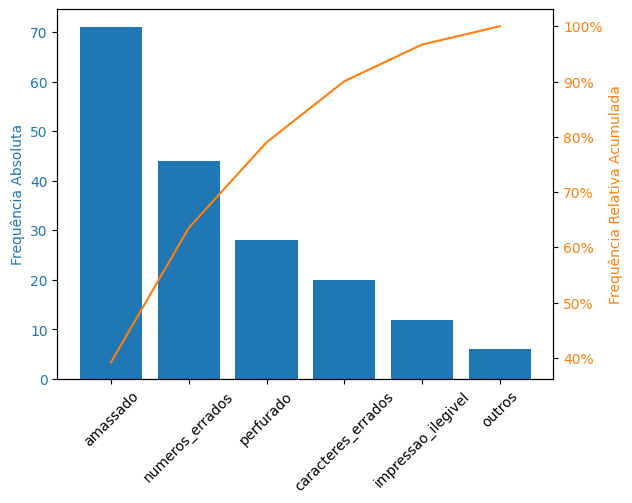

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.bar(df_pareto.index, df_pareto['frequencia'], color = 'C0')
ax2.plot(df_pareto.index, df_pareto['frequencia_relativa_acumulada'], color = 'C1')

ax.set_ylabel('Frequência Absoluta', color = 'C0')
ax.tick_params(axis='y', labelcolor='C0')
ax.tick_params(axis='x', rotation = 45)

ax2.set_ylabel('Frequência Relativa Acumulada', color = 'C1')
ax2.tick_params(axis='y', labelcolor='C1')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()

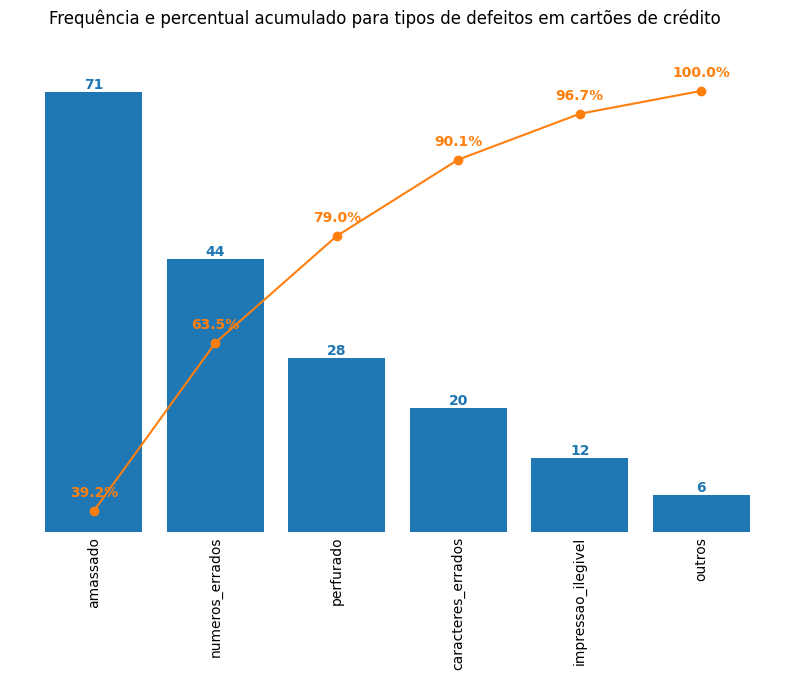

In [22]:
fig, ax = plt.subplots(figsize = (10, 6))

ax2 = ax.twinx()

ax.bar(df_pareto.index, df_pareto['frequencia'], color = 'C0')
ax2.plot(df_pareto.index, df_pareto['frequencia_relativa_acumulada'], color = 'C1', marker = 'o')

ax.bar_label(ax.containers[0], color = 'C0', fontweight = 'bold')

for i, percentual in enumerate(df_pareto['frequencia_relativa_acumulada']):
    ax2.annotate(f'{percentual:.1%}', (i, percentual), xytext=(0,10), textcoords='offset points', 
    ha = 'center', color = 'C1', fontweight = 'bold')

ax.tick_params(axis='y', labelleft = False, left = False)
ax.tick_params(axis='x', rotation = 90, size = 0)
ax2.tick_params(axis='y', labelright = False, right = False)

for spine in ax.spines.values():
    spine.set_visible(False)

for spine in ax2.spines.values():
    spine.set_visible(False)

fig.suptitle('Frequência e percentual acumulado para tipos de defeitos em cartões de crédito')

plt.show()